In [19]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
heart = pd.read_csv('/Users/yuqinhan1229/Desktop/heart_failure_clinical_records_dataset.csv')
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

### EDA

### Univariate Analysis

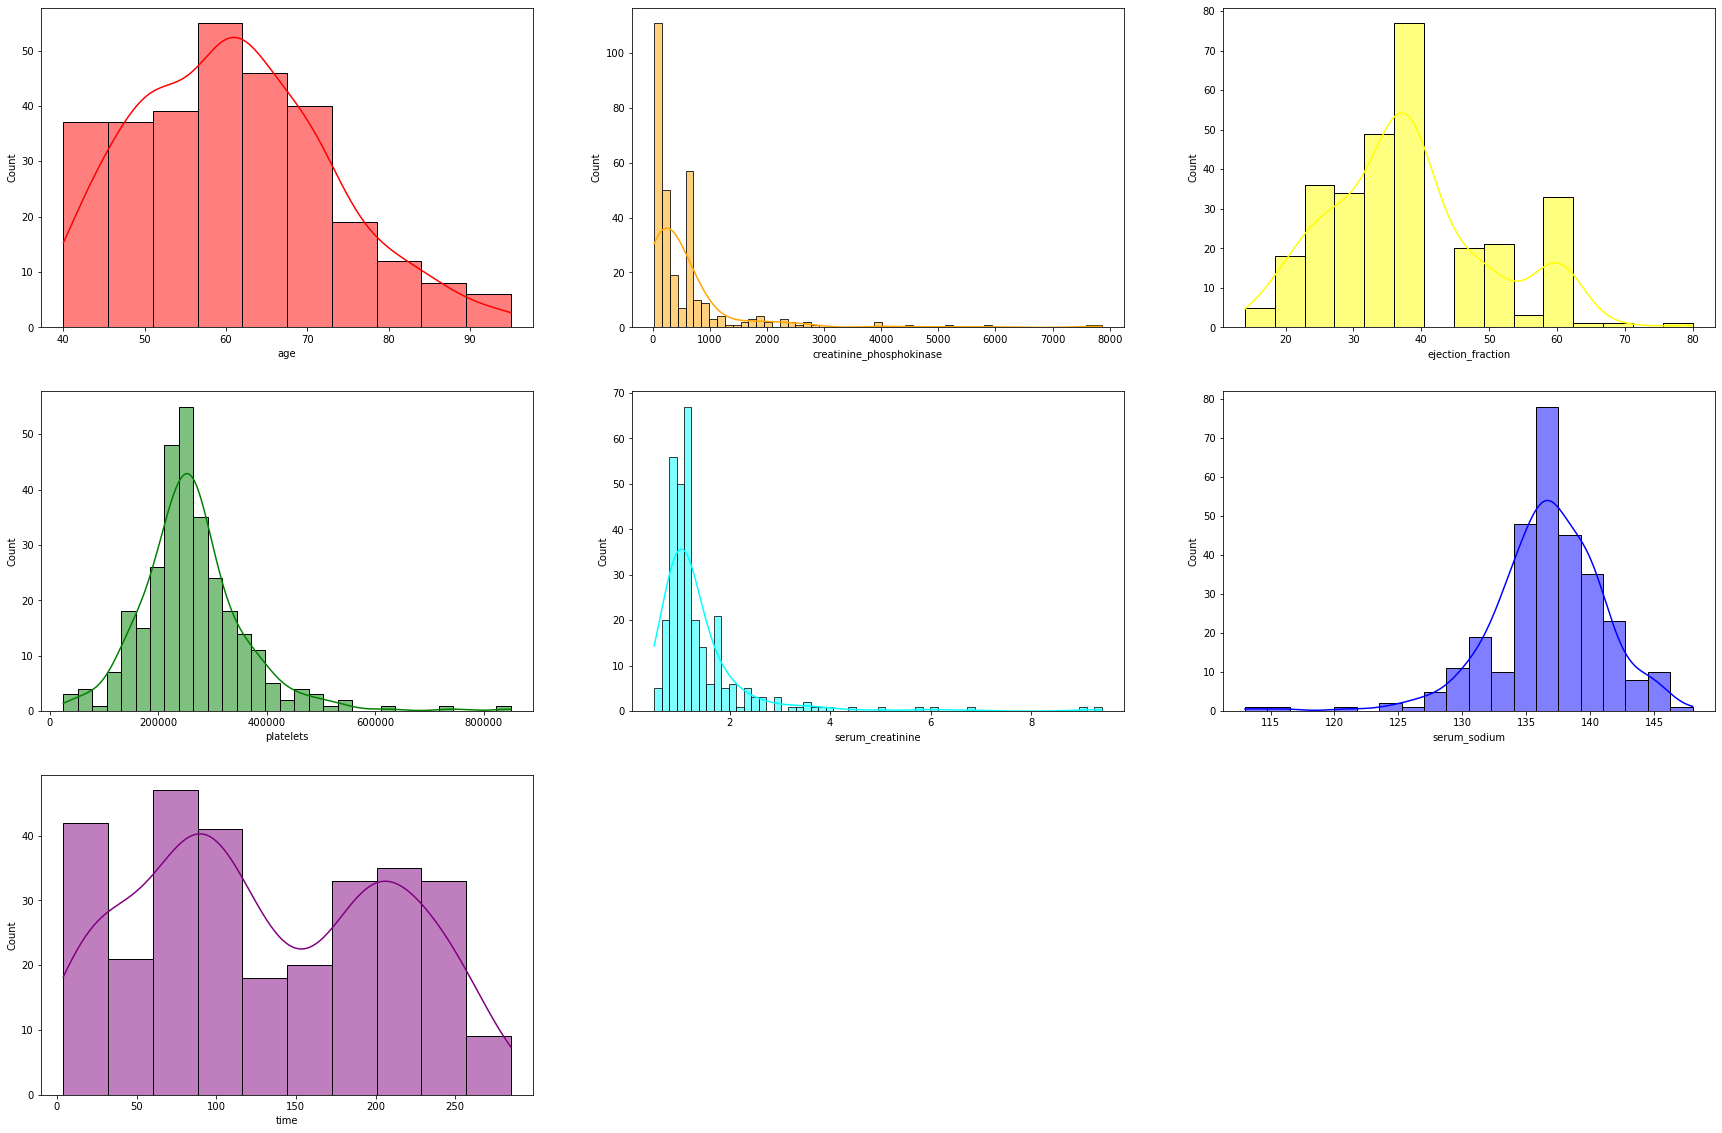

In [2]:
## Distribution of continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Find the continuous variable and set the color.
figure = plt.figure(figsize=(30, 20))
continues = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple']
for i in range(1, 8):
    plt.subplot(3,3,i)
    sns.histplot(heart[continues[i-1]], color = colors[i-1], kde=True)
    plt.xlabel(continues[i-1])
    plt.plot()

In [3]:
## Distribution transformation
from sklearn.preprocessing import PowerTransformer
t = np.array(list(heart['creatinine_phosphokinase'])).reshape(-1, 1)
pt = PowerTransformer(method='box-cox', standardize=False)
new = pt.fit_transform(t)
heart['creatinine_phosphokinase'] = new

t = np.array(list(heart['serum_creatinine'])).reshape(-1, 1)
pt = PowerTransformer(method='box-cox', standardize=False)
new = pt.fit_transform(t)
heart['serum_creatinine'] = new
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                  4.011877         0                 20   
1  55.0        0                  4.790978         0                 38   
2  65.0        0                  3.447415         0                 20   
3  50.0        1                  3.320114         0                 20   
4  65.0        1                  3.488730         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00          0.475058           130    1   
1                    0  263358.03          0.090952           136    1   
2                    0  162000.00          0.231062           129    1   
3                    0  210000.00          0.475058           137    1   
4                    0  327000.00          0.632279           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

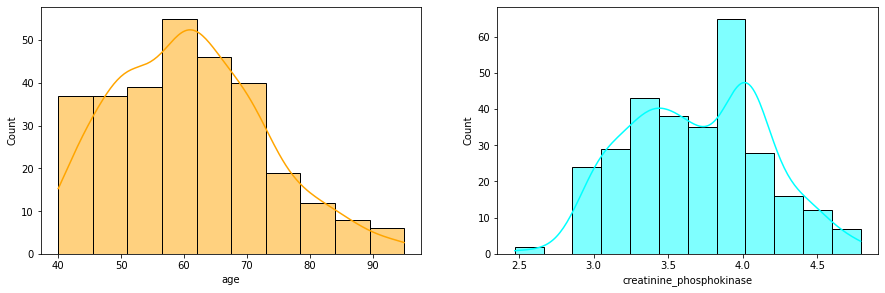

In [4]:
figure = plt.figure(figsize=(15, 10))
modify = ['creatinine_phosphokinase','serum_creatinine']
colors = ['orange', 'cyan']
for i in range(1, 3):
    plt.subplot(2,2,i)
    sns.histplot(heart[continues[i-1]], color = colors[i-1], kde=True)
    plt.xlabel(continues[i-1])
    plt.plot()

In [5]:
import pandas_profiling as pp
report = pp.ProfileReport(heart)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
report.to_file('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Bi-variate Analysis

<AxesSubplot:>

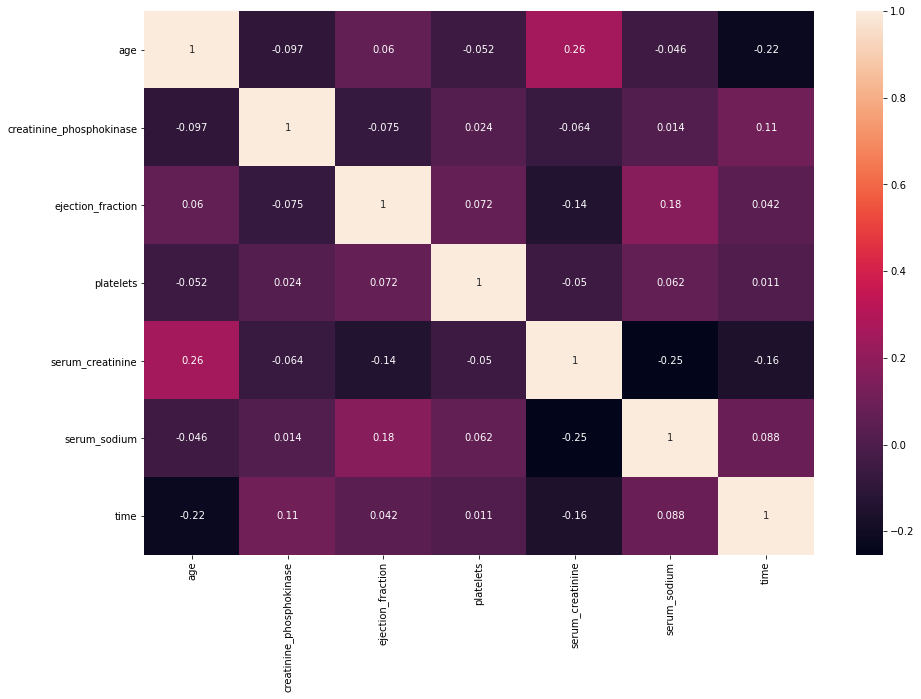

In [7]:
## Correlation analysis for continue variablies
conti_heart = heart[continues]
corrDf = conti_heart.corr()
figure = plt.figure(figsize=(15, 10))
sns.heatmap(corrDf,annot = True)

In [8]:
## Analysis between categorical variables and continues variables
categoricals = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
cate_heart = heart[categoricals]
cate_heart.head()

anaemia  diabetes  high_blood_pressure  sex  smoking  DEATH_EVENT
0        0         0                    1    1        0            1
1        0         0                    0    1        0            1
2        0         0                    0    1        1            1
3        1         0                    0    1        0            1
4        1         1                    0    0        0            1

In [9]:
## chi - test for smoking&others
from sklearn.feature_selection import chi2
dicts = dict()
index = ('anaemia','diaetes', 'high_blood_pressure', 'sex')
chi2_val, p_val = chi2(cate_heart.iloc[:, 0:4], cate_heart.iloc[:, 4])

itr = 0
for i in index:
    string = f'smoking vs {i}'
    dicts[string] = p_val[itr]
    itr += 1
for key, value in dicts.items():
        print(f'{key}: {value}')

smoking vs anaemia: 0.1618464687526976
smoking vs diaetes: 0.05221575927284853
smoking vs high_blood_pressure: 0.43776694989237386
smoking vs sex: 4.899856713610256e-06


## Build  models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Decision tree

In [28]:
## Spliting data set
import torch
train, test = train_test_split(heart,random_state =0, test_size = 0.3)
X_train = train.iloc[:,0:12]
Y_train = train.iloc[:,12]
X_test = test.iloc[:,0:12]
Y_test = test.iloc[:,12]
trainset = torch.utils.data.TensorDataset(torch.from_numpy(X_train.values),\
                                        torch.from_numpy(Y_train.values))
train_loader = torch.utils.data.DataLoader(trainset, batch_size=2,\
                                          shuffle=True)
testset = torch.utils.data.TensorDataset(torch.from_numpy(X_test.values),\
                                         torch.from_numpy(Y_test.values))
test_loader = torch.utils.data.DataLoader(testset, batch_size=2,\
                                         shuffle=False,num_workers=2)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
scores = clf.score(X_test, Y_test)
print("Train set score：" + str(clf.score(X_train, Y_train)))
print("Test set score：" + str(clf.score(X_test, Y_test)))

Train set score：0.9473684210526315
Test set score：0.8222222222222222


In [47]:
heart = pd.read_csv('/Users/yuqinhan1229/Desktop/heart_failure_clinical_records_dataset.csv')
heart.drop(columns = ['sex', 'diabetes'], inplace = True)

In [48]:
## Simplified decision tree
from sklearn import tree
train, test = train_test_split(heart,random_state =0, test_size = 0.3)
X_train = train.iloc[:,0:10]
Y_train = train.iloc[:,10]
X_test = test.iloc[:,0:10]
Y_test = test.iloc[:,10]
trainset = torch.utils.data.TensorDataset(torch.from_numpy(X_train.values),\
                                        torch.from_numpy(Y_train.values))
train_loader = torch.utils.data.DataLoader(trainset, batch_size=2,\
                                          shuffle=True)
testset = torch.utils.data.TensorDataset(torch.from_numpy(X_test.values),\
                                         torch.from_numpy(Y_test.values))
test_loader = torch.utils.data.DataLoader(testset, batch_size=2,\
                                         shuffle=False,num_workers=2)
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, Y_train)
scores = clf.score(X_test, Y_test)
print("Train set score：" + str(clf.score(X_train, Y_train)))
print("Test set score：" + str(clf.score(X_test, Y_test)))

Train set score：0.937799043062201
Test set score：0.8222222222222222


<ipython-input-31-f06eb67c4b7c>:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


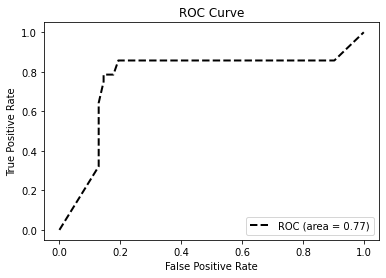

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
confusion_matrix(Y_test, y_pred)
y_predprob = clf.predict_proba(X_test)
metrics.roc_auc_score(Y_test,y_predprob[:,1])

fpr, tpr, thersholds = roc_curve(Y_test, y_predprob[:,1], pos_label=1)
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

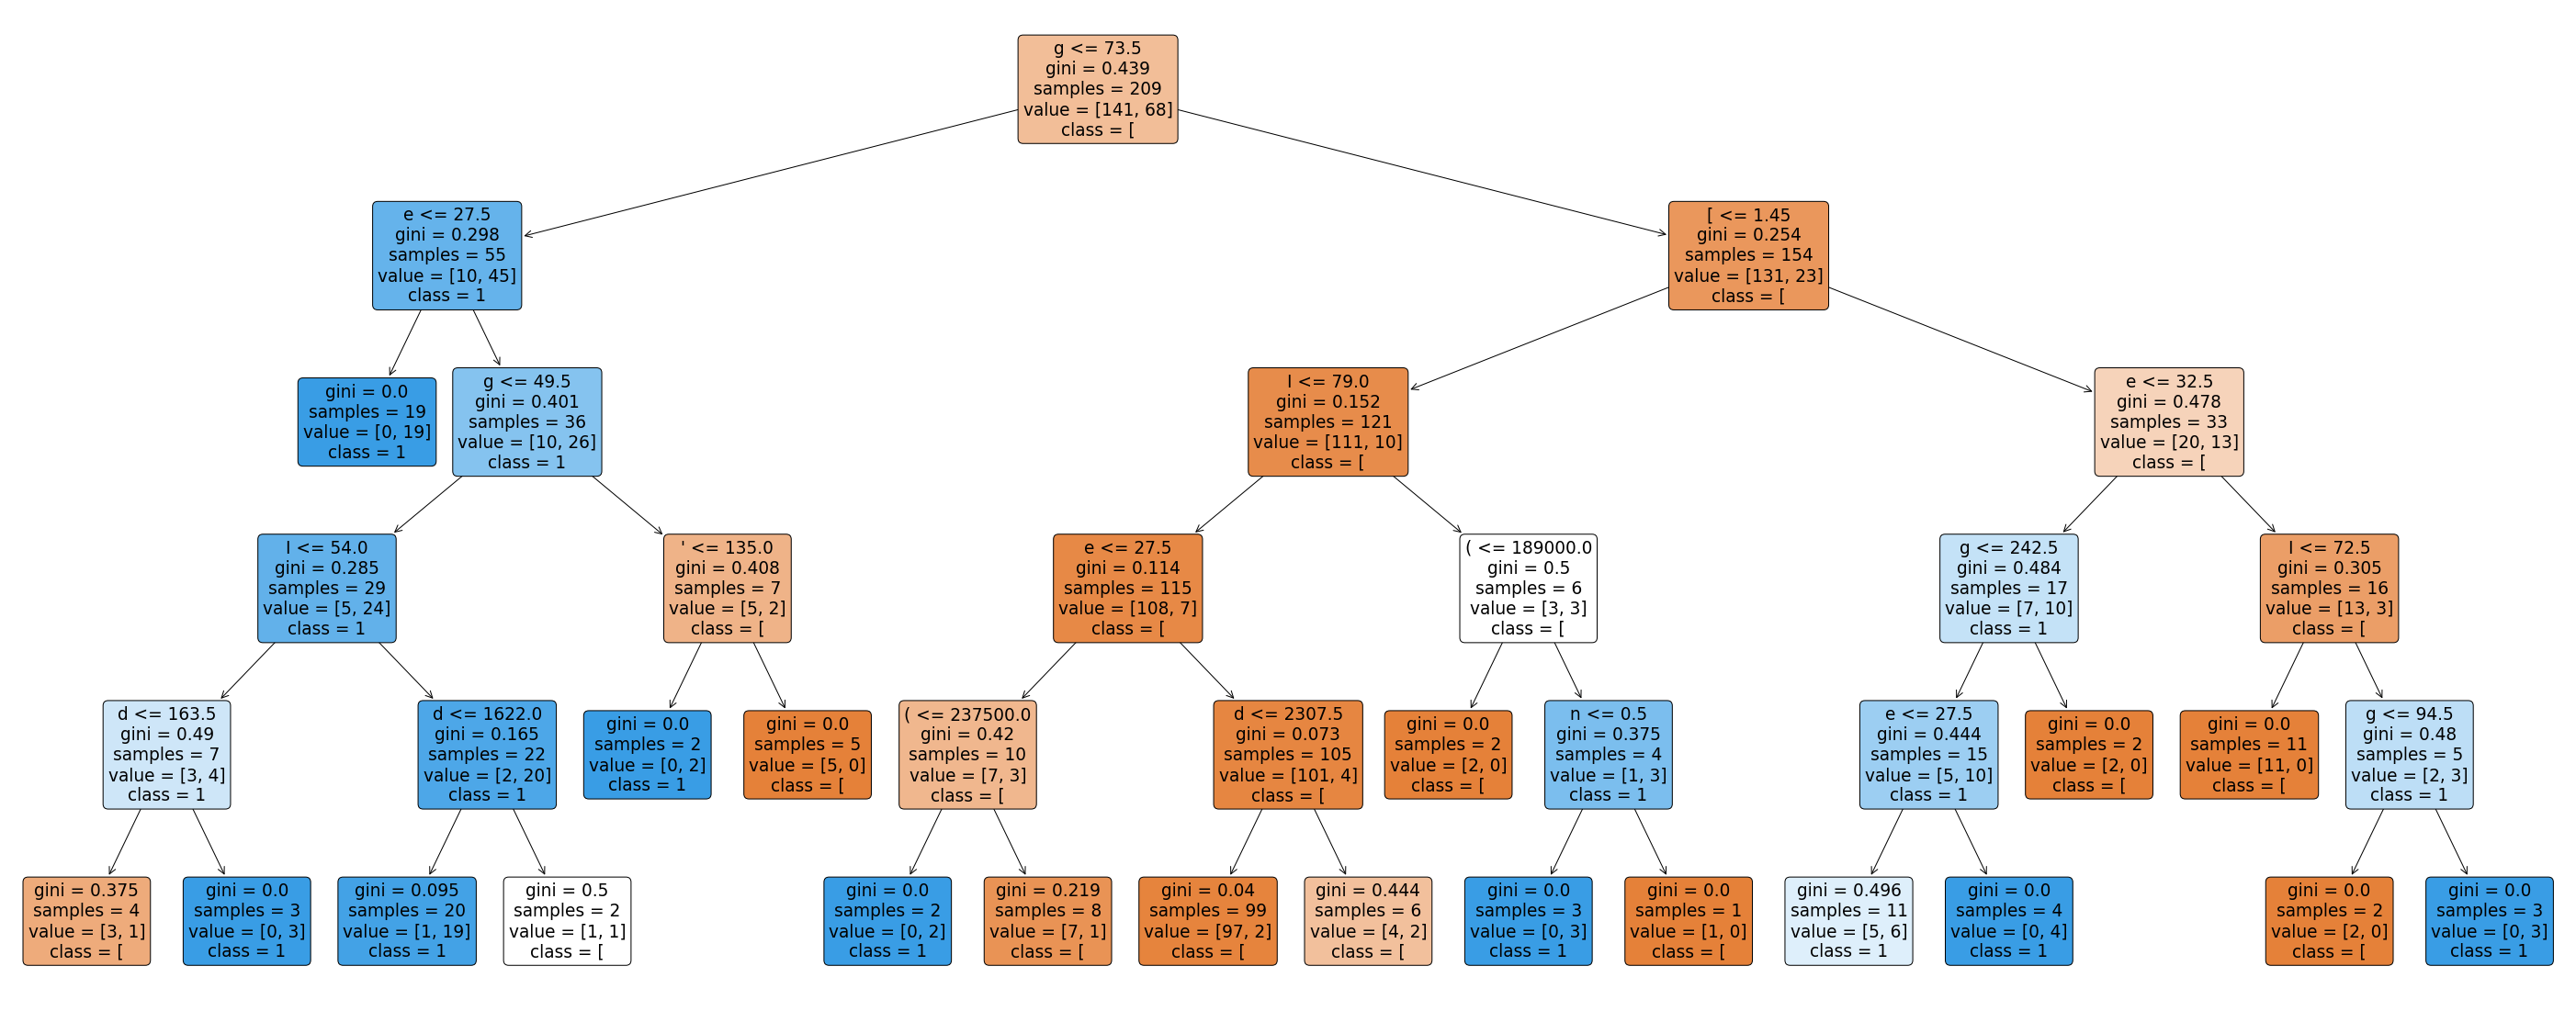

In [32]:
from sklearn.tree import plot_tree
feature_names = heart.columns[:10]
target_names = heart['DEATH_EVENT'].unique().tolist()

figure = plt.figure(figsize=(50, 20))
plot_tree(clf, 
          feature_names = str(feature_names), 
          class_names = str(target_names), 
          filled = True, 
          rounded = True)
plt.savefig('tree_visualization.png')

In [33]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[53  9]
 [ 7 21]]


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train, Y_train)


print("Train set score：" + str(lr.score(X_train, Y_train)))
print("Test set score：" + str(lr.score(X_test, Y_test)))

Train set score：0.8421052631578947
Test set score：0.8333333333333334


/Users/yuqinhan1229/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_pred = lr.predict(X_test)
y_predprob = lr.predict_proba(X_test)
metrics.roc_auc_score(Y_test,y_predprob[:,1])

0.8283410138248848

<ipython-input-36-d72680e7e8be>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


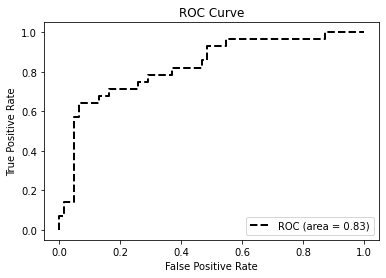

In [36]:
y_pred = lr.predict(X_test)
confusion_matrix(Y_test, y_pred)
y_predprob = lr.predict_proba(X_test)
metrics.roc_auc_score(Y_test,y_predprob[:,1])

fpr, tpr, thersholds = roc_curve(Y_test, y_predprob[:,1], pos_label=1)
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Variances Importances')

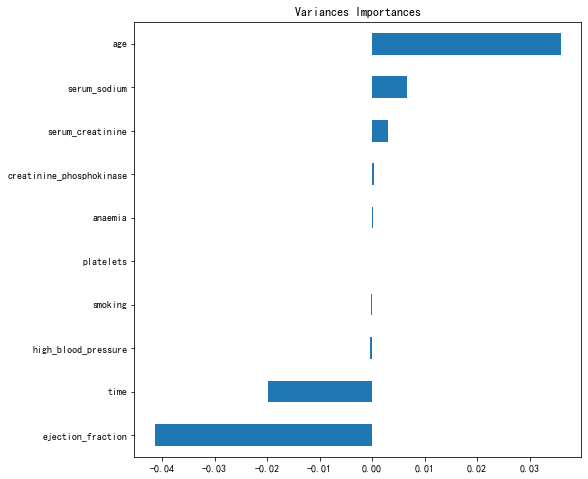

In [37]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
coef_LR = pd.Series(lr.coef_.flatten(),index = X_test.columns,name = 'Var')

plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")

## Evaluate model ------- 5 fold cross validation

In [38]:
heart.head()

age  anaemia  creatinine_phosphokinase  ejection_fraction  \
0  75.0        0                       582                 20   
1  55.0        0                      7861                 38   
2  65.0        0                       146                 20   
3  50.0        1                       111                 20   
4  65.0        1                       160                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  smoking  \
0                    1  265000.00               1.9           130        0   
1                    0  263358.03               1.1           136        0   
2                    0  162000.00               1.3           129        1   
3                    0  210000.00               1.9           137        0   
4                    0  327000.00               2.7           116        0   

   time  DEATH_EVENT  
0     4            1  
1     6            1  
2     7            1  
3     7            1  
4     8            1

In [39]:
from sklearn.model_selection import KFold, cross_val_score
from patsy import dmatrices
kf = KFold(n_splits = 5)
y, X = dmatrices('DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + '
                 'ejection_fraction + high_blood_pressure + '
                 'platelets + serum_creatinine + serum_sodium + smoking + time', heart)

### Decision tree

In [40]:
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
print(scores)
sums = 0
for i in scores:
    sums = i + sums
D_sc = sums/5
print('Scores of Decision tree is: ' + str(D_sc))

[0.55, 0.65, 0.8166666666666667, 0.7833333333333333, 0.8813559322033898]
Scores of Decision tree is: 0.7362711864406779


### Logistic Regression

In [41]:
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test,y_test))
print(scores)
sums = 0
for i in scores:
    sums = i + sums
L_sc = sums/5
print('Scores of Decision tree is: ' + str(L_sc))

[0.5833333333333334, 0.4666666666666667, 0.8, 0.7833333333333333, 0.9491525423728814]
Scores of Decision tree is: 0.716497175141243


/Users/yuqinhan1229/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yuqinhan1229/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yuqinhan1229/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yuqinhan1229/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was 

## Clustering

In [42]:
#Clustering
heart = pd.read_csv('/Users/yuqinhan1229/Desktop/heart_failure_clinical_records_dataset.csv')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
heart = heart.drop('DEATH_EVENT',axis=1) 
kmeans = KMeans(n_clusters=2,random_state=42).fit(heart.values)
kmeans_2 = pd.DataFrame(kmeans.labels_,columns=['cluster'])

pca = PCA(n_components = 2).fit(heart)
pca_trans = pca.transform(heart)
pca_trans_df = pd.DataFrame(pca_trans,columns=['pca1','pca2'])
kmeans_2 = pd.concat([kmeans_2,pca_trans_df],axis=1)
kmeans_2

cluster           pca1         pca2
0          0    1641.969406    -0.145905
1          0       1.766518  7279.254974
2          0 -101358.133289  -411.138654
3          0  -53358.143086  -457.772091
4          1   63641.865204  -437.190782
..       ...            ...          ...
294        0 -108358.151303  -494.646424
295        0    6642.272281  1236.444799
296        1  478642.316896  1361.875609
297        0 -123357.579804  1861.000157
298        1  131641.874613  -417.903332

[299 rows x 3 columns]

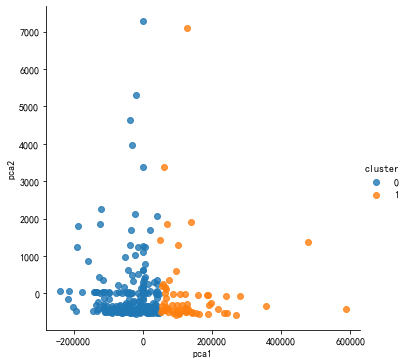

In [43]:
fig = sns.lmplot(x='pca1',y='pca2',data=kmeans_2,hue='cluster',fit_reg=False)

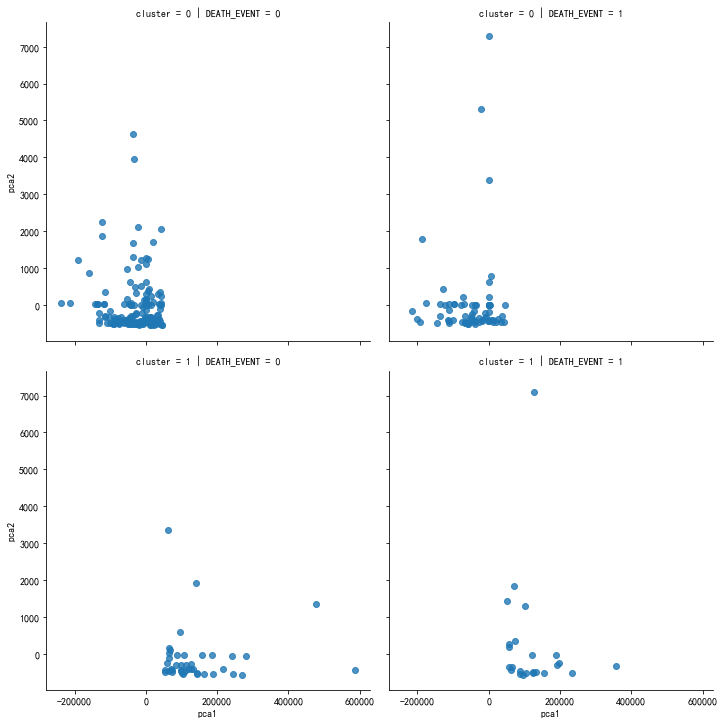

In [44]:
heart_all = pd.read_csv('/Users/yuqinhan1229/Desktop/heart_failure_clinical_records_dataset.csv')
kmeans_2 = pd.concat([kmeans_2,heart_all['DEATH_EVENT']],axis=1)
fig = sns.lmplot(x='pca1',y='pca2',data=kmeans_2,
                 fit_reg=False,row='cluster',col='DEATH_EVENT')
plt.savefig('cluster.png')